In [1]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import glob
import os
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import imgaug.augmenters as iaa

In [2]:
faces_folder_path = "faces"
predictor_path = "68_predictor.dat"
def process_pic(src):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)
    img = dlib.load_rgb_image(os.path.join(faces_folder_path ,src))
    imgs = [img for i in range(1)]
    dets = detector(img, 1)
    shape = predictor(img, dets[0])

    np_points = np.zeros((shape.num_parts,2), dtype=np.uint16)
    for i in range(shape.num_parts):
        np_points[i,0] = shape.part(i).x
        np_points[i,1] = shape.part(i).y
    return img, np_points

In [3]:
def slice_eye(img, parts):
    left = min(parts[:, 0]) - 5
    top = min(parts[:, 1]) - 5
    right = max(parts[:, 0]) + 5
    bottom = max(parts[:, 1]) + 5
    size, middle_x, middle_y = 0, 0, 0
    if right - left >= top - bottom:
        size = right - left
    else:
        size = top - bottom
    if size % 2 == 1:
        size += 1
    size += 6
    middle_y = int((top + bottom) / 2)
    middle_x = int((left + right) / 2)
    bottom = int(middle_y + size / 2) 
    top = int(middle_y - size / 2) 
    left = int(middle_x - size / 2)
    right = int(middle_x + size / 2)
    result = img[top:bottom, left:right]

    aug = iaa.Grayscale(alpha=1)
    result = aug(images=[result])[0]
    return result, left, top

In [4]:
from ipywidgets import IntProgress
from IPython.display import display
srcs = os.listdir(faces_folder_path)
f = IntProgress(min=0, max=len(srcs))
display(f)
for src in srcs:
    img, points = process_pic(src)
    l_eye, _, _ = slice_eye(img, points[36:42])
    r_eye, _, _ = slice_eye(img, points[43:48])
    Image.fromarray(l_eye).save(os.path.join("eyes", str(f.value)+"l.png"))
    Image.fromarray(r_eye).save(os.path.join("eyes", str(f.value)+"r.png"))
    f.value += 1
    if f.value >=100:
        break

IntProgress(value=0, max=1000)

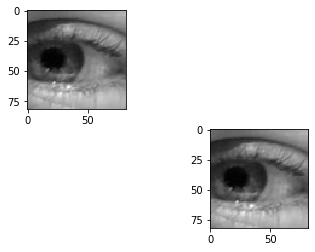

In [116]:
from skimage.feature import canny 
from scipy import ndimage as ndi
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('eyes/34r.png',0)
edges = canny(img/255, sigma=2, low_threshold=0.1, high_threshold=0.3)
_, circle = cv2.threshold(img,30,255,cv2.THRESH_BINARY)
edges = edges.astype(np.float32)
#circle = ndi.binary_fill_holes(edges)
#circle = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 1)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(circle,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

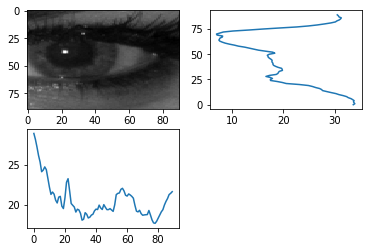

In [153]:
from skimage.feature import canny 
from scipy import ndimage as ndi
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('eyes/25r.png',0)
edges = canny(img/255, sigma=2, low_threshold=0.1, high_threshold=0.3)
_, circle = cv2.threshold(img,30,255,cv2.THRESH_BINARY)
edges = edges.astype(np.float32)
#circle = ndi.binary_fill_holes(edges)
#circle = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 1)
vert_sum = np.zeros(img.shape[0])
horiz_sum = np.zeros(img.shape[1])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        vert_sum[j] += img[i][j]
        horiz_sum[i] += img[i][j]
vert_sum /= 255
horiz_sum /= 255

plt.subplot(221),plt.imshow(img,cmap = 'gray', aspect='auto')
plt.subplot(223), plt.plot(vert_sum,scalex=True)
plt.subplot(222), plt.plot(horiz_sum,range(img.shape[1])[::-1])
plt.show()